In [15]:
#!pip install pandas 
#!pip install matplotlib
#!pip install plotly
#!pip install seaborn
#!pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np


In [7]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (df['BMI'] > 25).astype(int)
df.drop(columns=['BMI'], inplace=True)

In [10]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

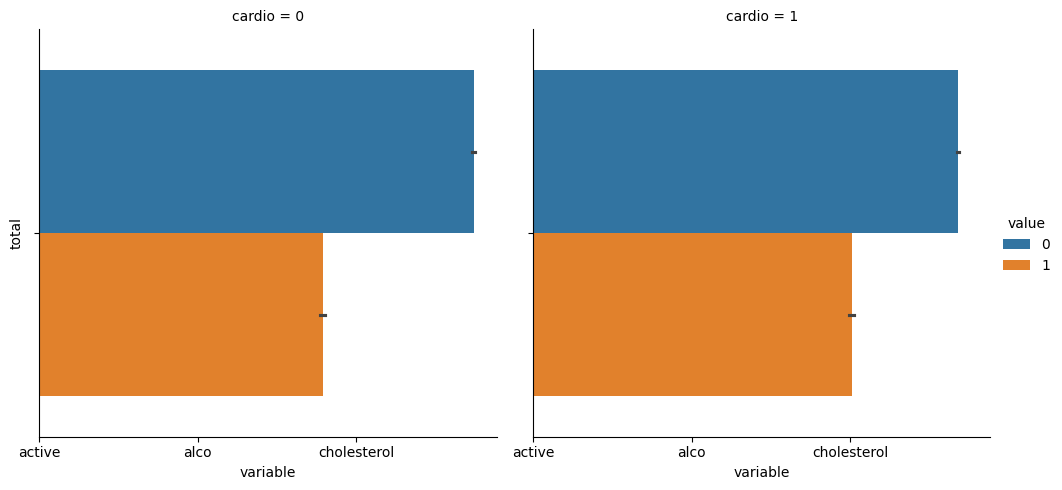

In [12]:
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, id_vars = ["cardio"], value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    # 8
    figure = sns.catplot(x = "variable", kind = "bar", hue = "value", data = df_cat, col = "cardio")

    figure.set_axis_labels("variable", "total")

    fig = figure
    
    # 9
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()

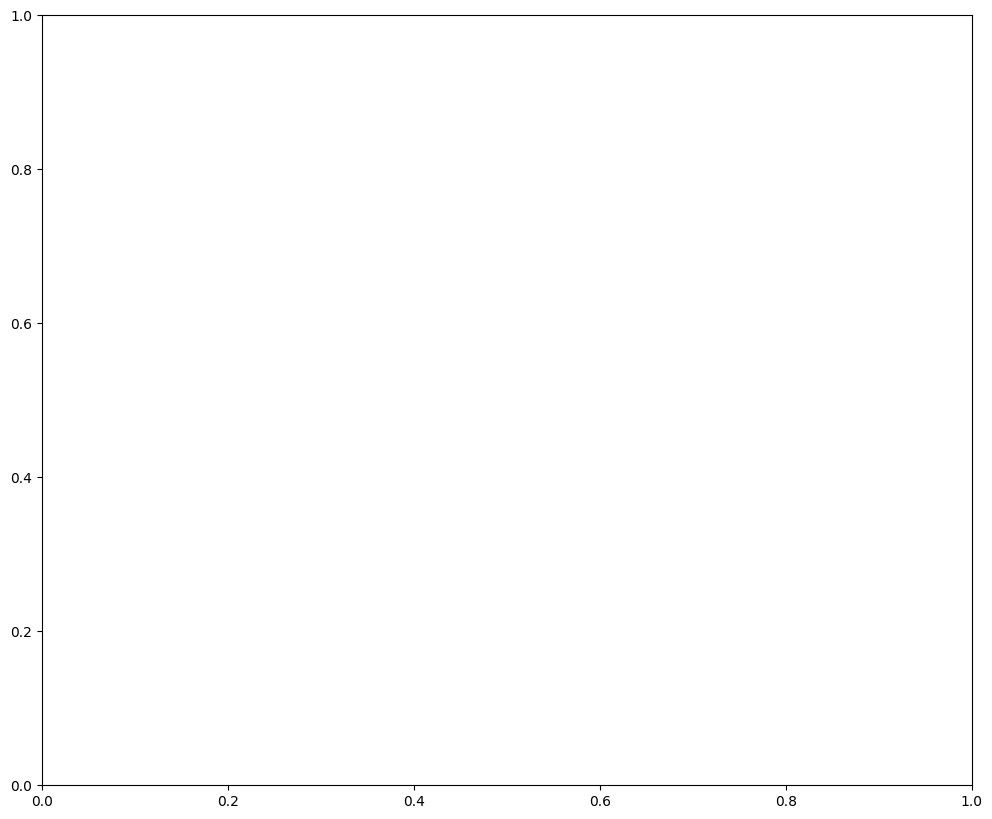

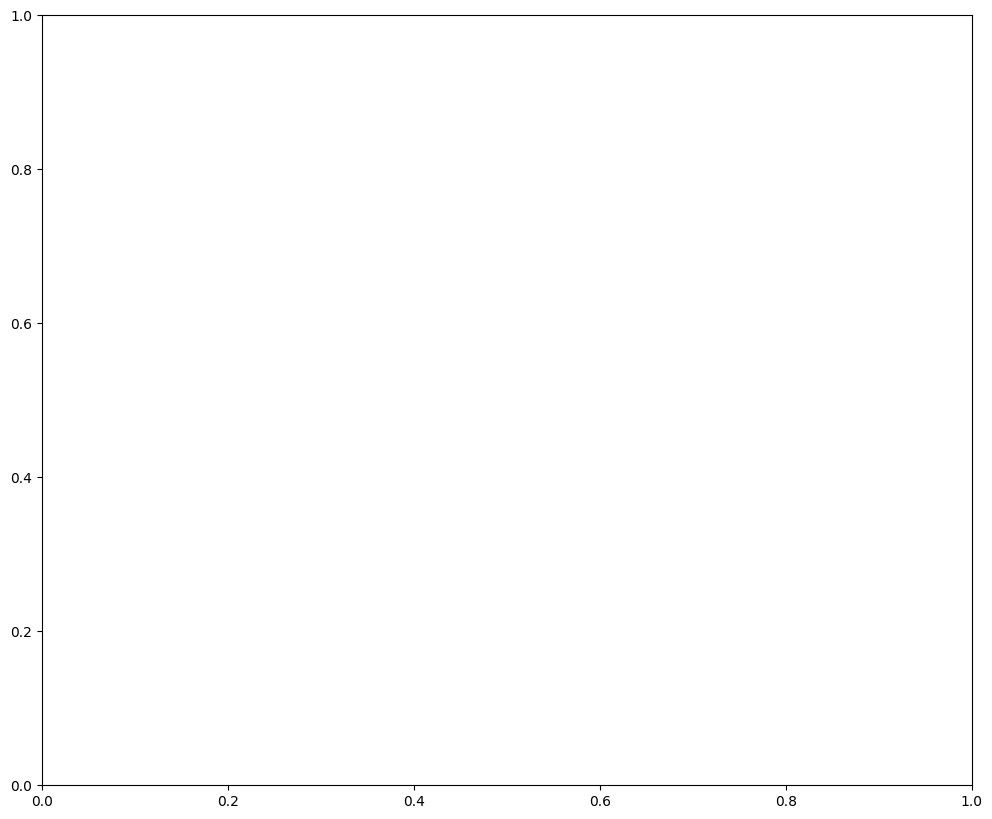

In [18]:
def draw_heat_map():
    # 11
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # 14
    fig, ax = plt.subplots(figsize=(12, 10))

    # 15



    # 16
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()